<a href="https://colab.research.google.com/github/RogerPannah/Data-science-Portfolio/blob/main/Python_Project_Foodhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Python: FoodHub Data Analysis

##Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

###Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.


Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information




In [ ]:
#importing libraries for data manipulation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

df= pd.read_csv('/content/drive/MyDrive/Python_Course/foodhub_order.csv')

df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#checking the shape of the dataset
df.shape

(1898, 9)

Observations:

*   The DataFrame has 1898 rows and 9 columns.





In [ ]:
#concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:


* There are a total of 1898 non-null observations in each of the columns.

* The dataset contains 9 columns: 4 are of integer type ('order_id', 'customer_id', 'food_preparation_time', 'delivery_time'), 1 is of floating point type ('cost_of_the_order') and 4 are of the general object type ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating').

* Total memory usage is approximately 133.6 KB.



checking for missing values in the dataset

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

* There are no missing values in the data.


In [ ]:
# getting the statistical summery of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

* Order ID and Customer ID are just identifiers for each order.

* The cost of an order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.

* Food preparation time ranges from 20 to 35 minutes, with an average of around 27 minutes and a standard deviation of 4.6 minutes. The spread is not very high for the food preparation time.

* Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and a standard deviation of 5 minutes. The spread is not too high for delivery time either.

How many orders are not rated?

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

* There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

###Univariate *Analysis*

Exploration of all variables and observation of their distributions

In [ ]:
df['order_id'].nunique()

1898

#### Observations:

* There are 1898 unique orders.

Customer ID

In [ ]:
df['customer_id'].nunique()

1200

#### Observations:

* There are 1200 unique customers. As 'customer_id' is a variable to identify customers, and the number of unique customer IDs is less than the number of unique order IDs, we can see that there are some customers who have placed more than one order.

Restaurant name

In [ ]:
#checking the unique restaurant name
df['restaurant_name'].nunique()

178

#### Observations:

* There are 178 unique restaurants in the dataset.

* Let's check the number of orders that get served by the restaurants.

In [ ]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:

* The restaurant that has received maximum number of orders is Shake Shack

Cuisine type

In [ ]:
df['cuisine_type'].nunique()

14

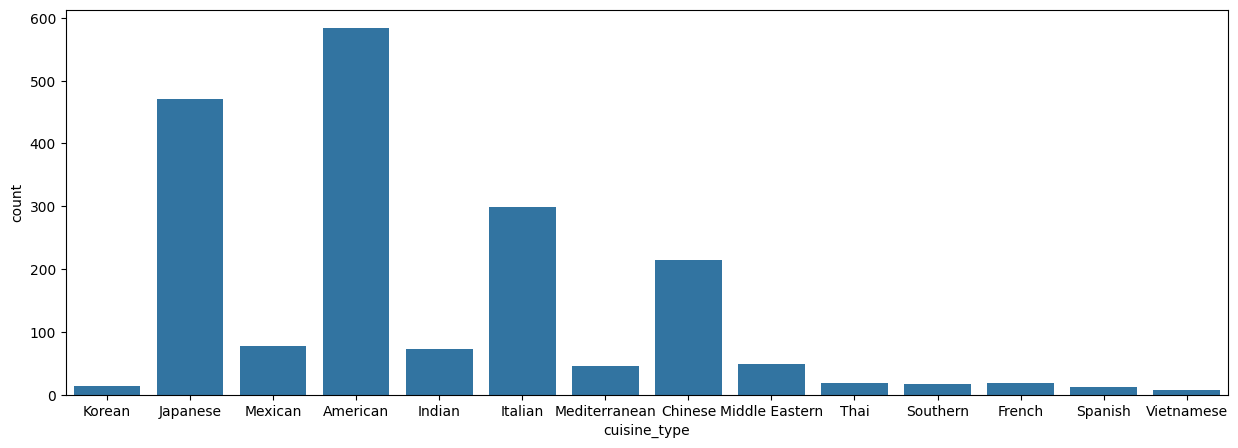

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(df, x='cuisine_type');

#### Observations:

* There are 14 unique cuisines in the dataset.

* The distribution of cuisine types show that cuisine types are not equally distributed.

* The most frequent cuisine type is American followed by Japanese and Italian.

* Vietnamese appears to be the least popular of all the cuisines.

Cost of the order

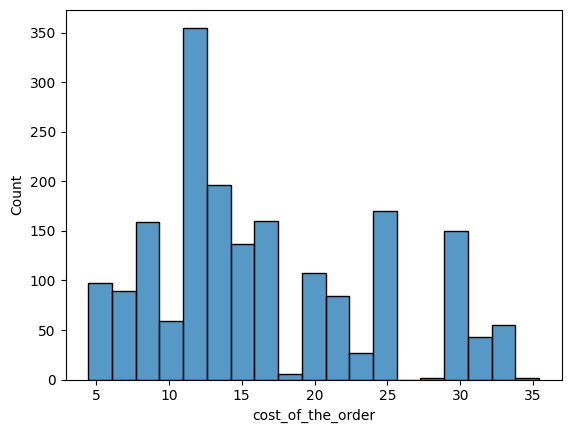

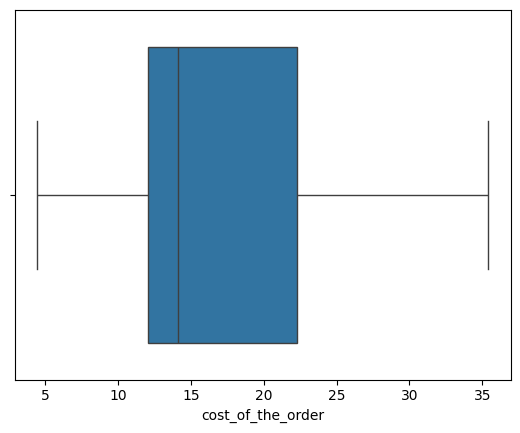

In [ ]:
sns.histplot(df, x='cost_of_the_order')
plt.show()
sns.boxplot(df, x= 'cost_of_the_order')
plt.show()

#### Observations:

* The average cost of the order is greater than the median cost indicating that the distribution for the cost of the order is right-skewed.

* The mode of the distribution indicates that a large chunk of people prefer to order food that costs around 10-12 dollars.

* There are few orders that cost greater than 30 dollars. These orders might be for some expensive meals.

Day of the week

In [ ]:
# check the unique values
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


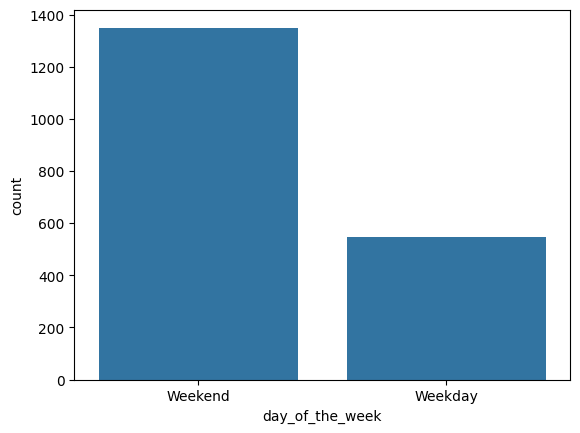

In [ ]:
sns.countplot(df, x='day_of_the_week');

#### Observations:

* The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend
* The distribution shows that number of order placed on weekends is approximately double the number of orders placed on weekdays.

Rating

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


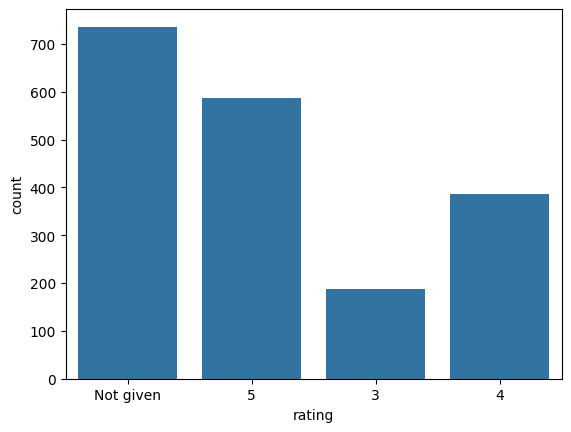

In [ ]:
sns.countplot(df, x='rating');

#### Observations:

* The distribution of 'rating' shows that the most frequent rating category is 'not given', followed by a rating of 5.

* Only around 200 orders have been rated 3.

Food Preparation time

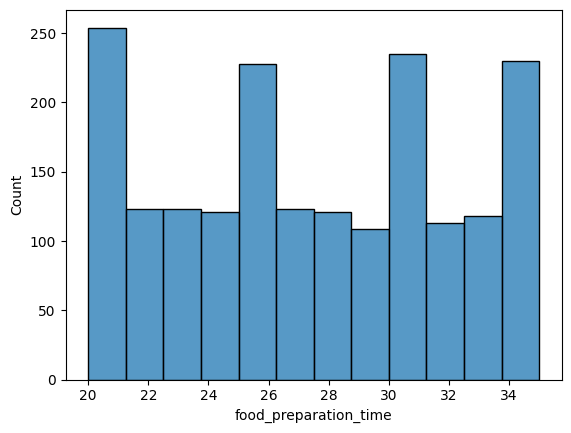

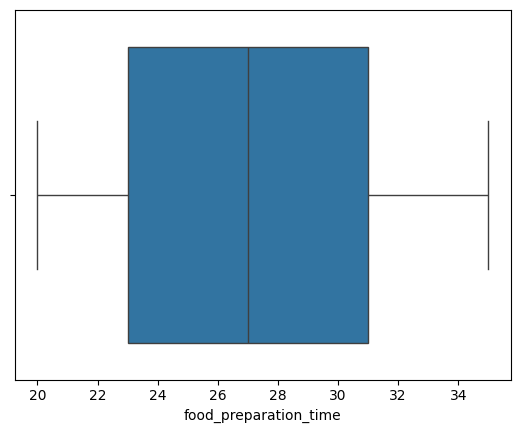

In [ ]:
sns.histplot(df, x='food_preparation_time')
plt.show()
sns.boxplot(df, x= 'food_preparation_time')
plt.show()

#### Observations:

* The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.

* The food preparation time is pretty evenly distributed between 20 and 35 minutes.

* There are no outliers in this column.

Delivery time

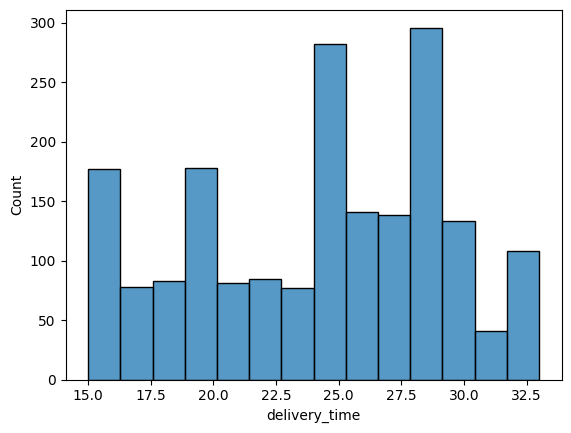

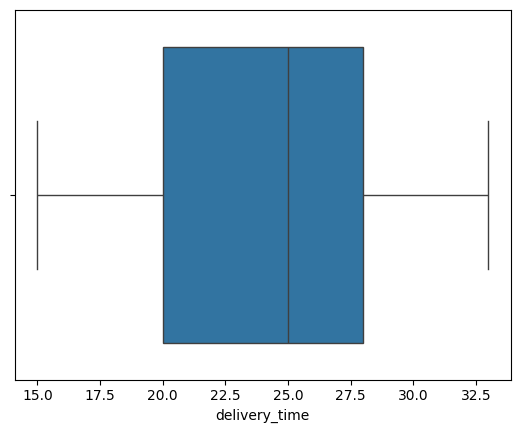

In [ ]:
sns.histplot(df, x= 'delivery_time')
plt.show()
sns.boxplot(df, x= 'delivery_time')
plt.show()

#### Observations:

* The average delivery time is a bit smaller than the median delivery time indicating that the distribution is a bit left-skewed.

* Comparatively more number of orders have delivery time between 24 and 30 minutes.

* There are no outliers in this column.

##Getting the tope 5 resuarent in terms of order received

In [ ]:
df['restaurant_name'].value_counts()[:5]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

* Top 5 popular restaurants that have received the highest number of orders **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'**.

* Almost 33% of the orders in the dataset are from these restaurants.


##Getting most popular cuisine on weekends

In [ ]:
#Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:

* The most popular cuisine type on weekends is American.


##What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('the number of orders great than 20:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20. shape[0] / df.shape[0]) * 100
print('percentage of orders greater than 20:', round(percentage, 2), '%')

the number of orders great than 20: 555
percentage of orders greater than 20: 29.24 %


#### Observations:

* There are a total of 555 orders that cost above 20 dollars.

* The percentage of such orders in the dataset is around 29.24%.

##What is the mean order delivery time?

In [ ]:
# get the mean delivery time
print('the mean of the delivery time is:',round(df['delivery_time'].mean(),2),'minutes')

the mean of the delivery time is: 24.16 minutes


#### Observations:

* The mean delivery time is around 24.16 minutes.


##The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts()[:5]

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:
- Customer with ID 52832 has ordered 13 times.

#Multivariate Analysis

##Performing a multivariate analysis to explore relationships between the important variables in the dataset.

###Cuisine vs Cost of the order

<ipython-input-127-e9196a412a76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='cuisine_type', y='cost_of_the_order', palette='PuBu')


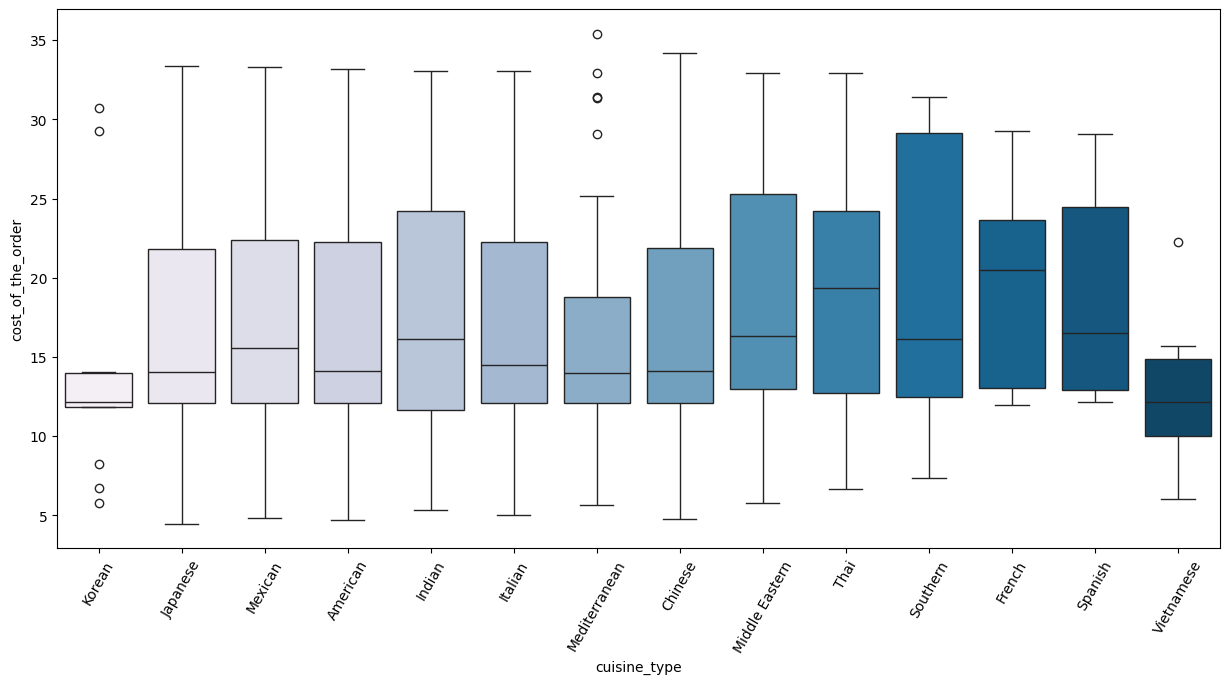

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(df, x='cuisine_type', y='cost_of_the_order', palette='PuBu')
plt.xticks(rotation = 60)
plt.show()


#### Observations:

* Vietnamese and Korean cuisines cost less compared to other cuisines.
* The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* French and Spanish cuisines are costlier compared to other cuisines.

###Cuisine vs Food Preparation time

<ipython-input-128-57d8c950a2c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = 'cuisine_type', y= 'food_preparation_time', palette = 'PuBu')


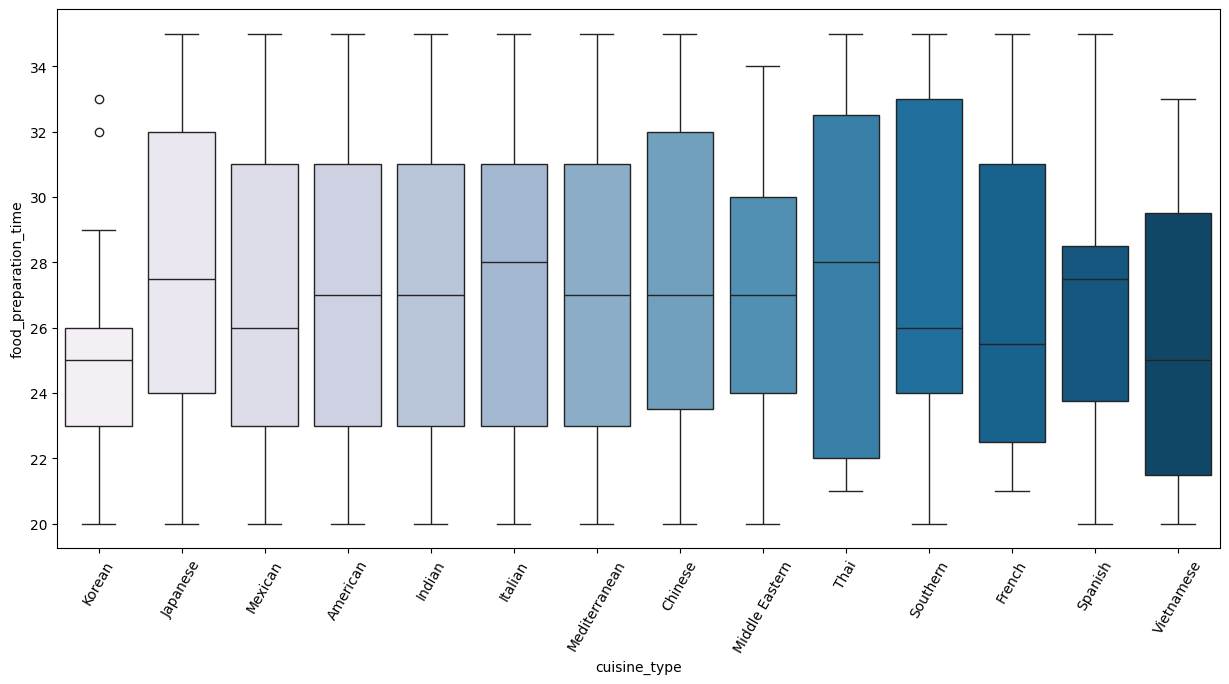

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize = (15,7))
sns.boxplot(df, x = 'cuisine_type', y= 'food_preparation_time', palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Food preparation time is very consistent for most of the cuisines.
* The median food preparation time lies between 24 and 30 minutes for all the cuisines.
* Outliers are present for the food preparation time of Korean cuisine.
* Korean cuisine takes less time compared to the other cuisines.


###Day of the Week vs Delivery time

<ipython-input-129-661a6cd980c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = 'day_of_the_week', y = 'delivery_time', palette= 'PuBu')


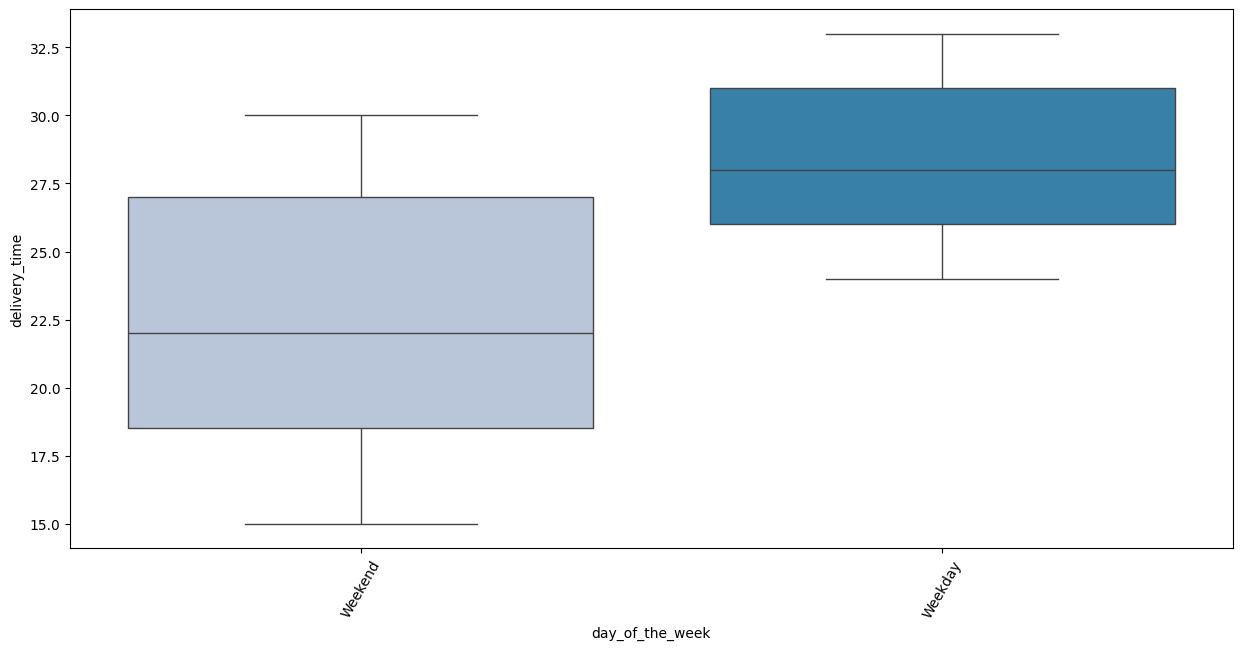

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize = (15,7))
sns.boxplot(df, x = 'day_of_the_week', y = 'delivery_time', palette= 'PuBu')
plt.xticks(rotation = 60);


#### Observations:

* The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.

Revenue generated by the restaurants

In [ ]:
plt.figure(figsize=(15,7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


<Figure size 1500x700 with 0 Axes>

#### Observations:

* The above 14 restaurants are generating more than 500 dollars revenue.

Rating vs Delivery time

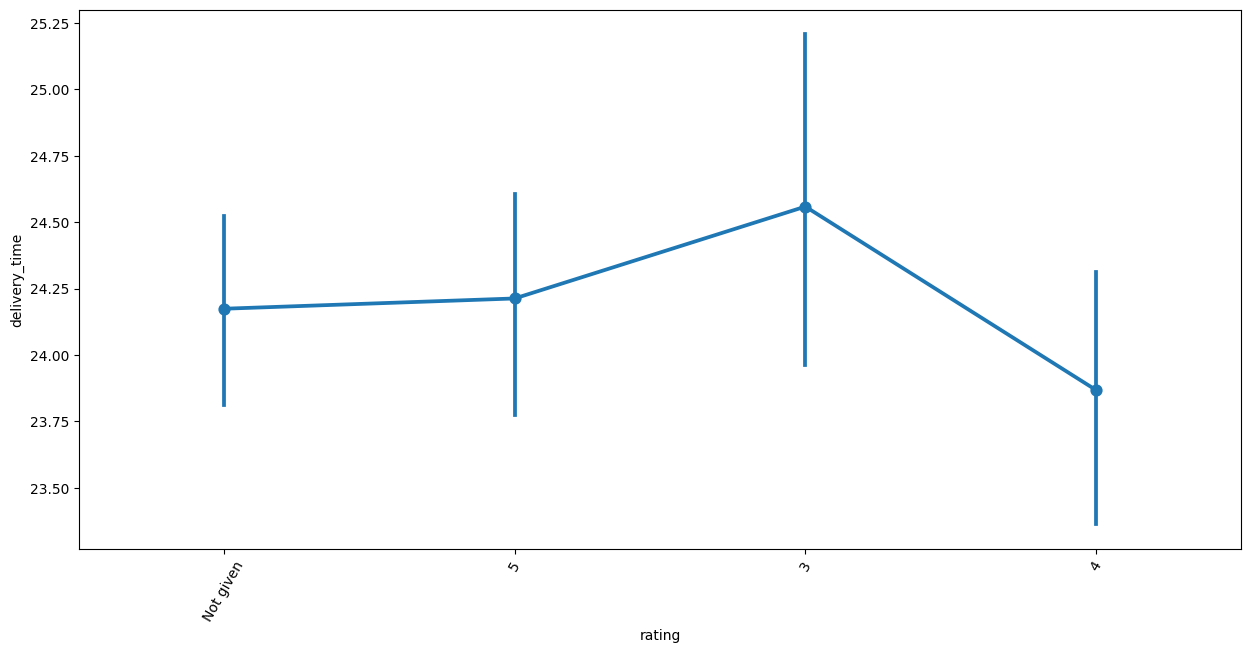

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot( df, x = 'rating', y= 'delivery_time')
plt.xticks(rotation =60)
plt.show()

#### Observations:

* It is possible that delivery time plays a role in the low-rating of the orders.


Rating vs Food preparation time

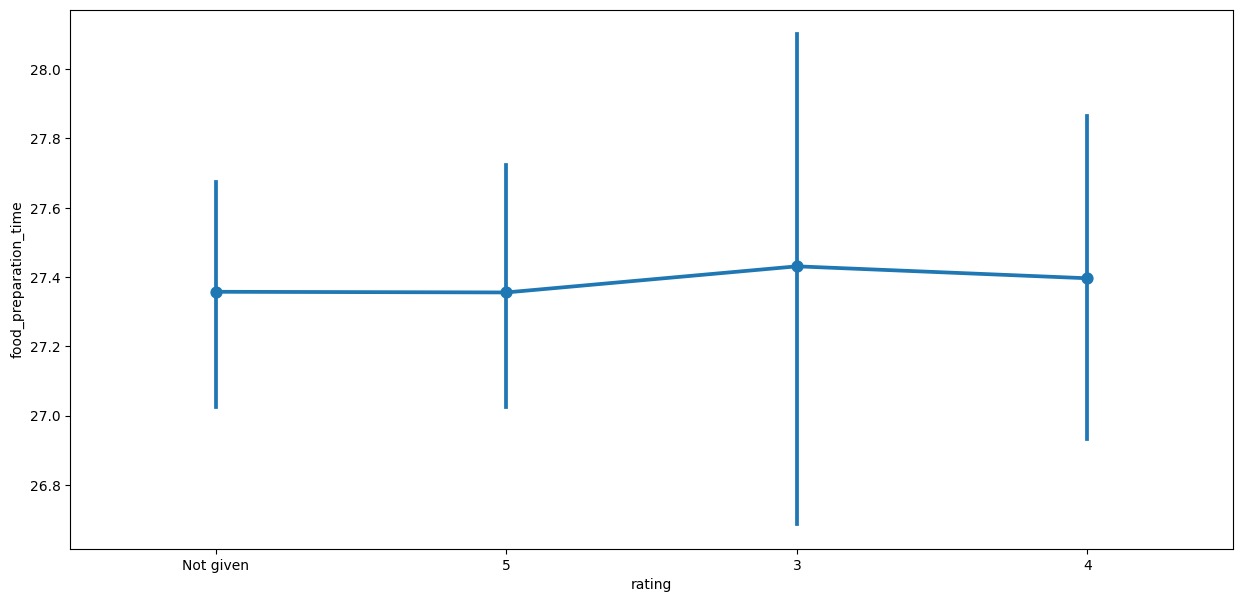

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(df, x= 'rating',y = 'food_preparation_time')
plt.show()

#### Observations:

* It seems that food preparation time does not play a role in the low-rating of the orders.


Rating vs Cost of the order

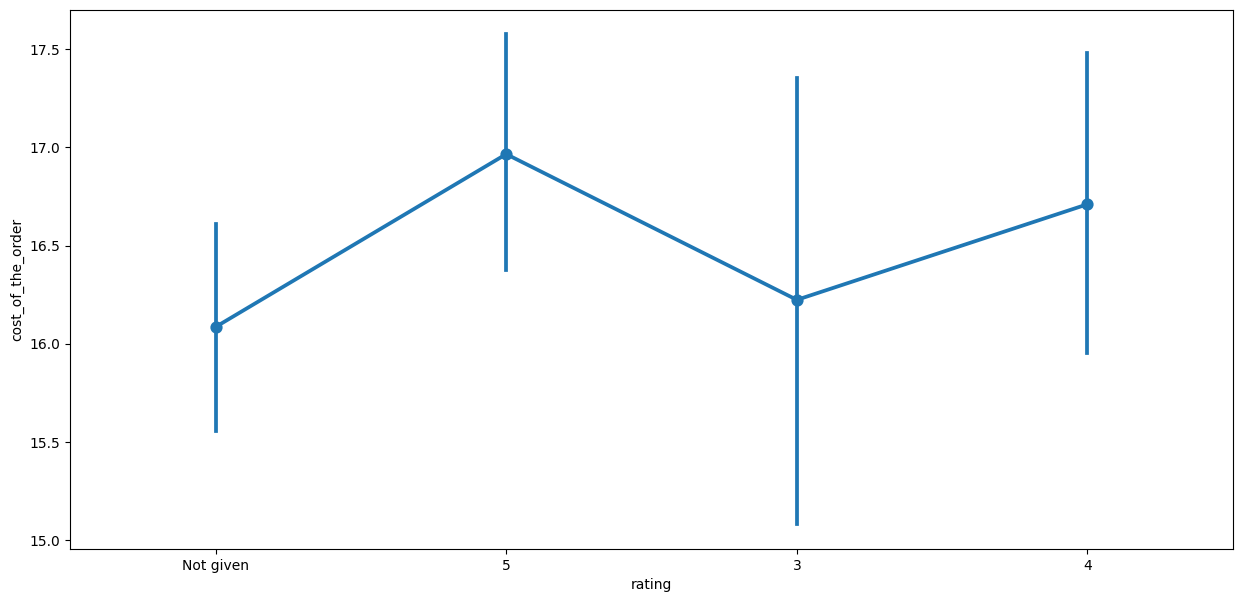

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations

* It seems that high-cost orders have been rated well and low-cost orders have not been rated.

###Correlation among variables

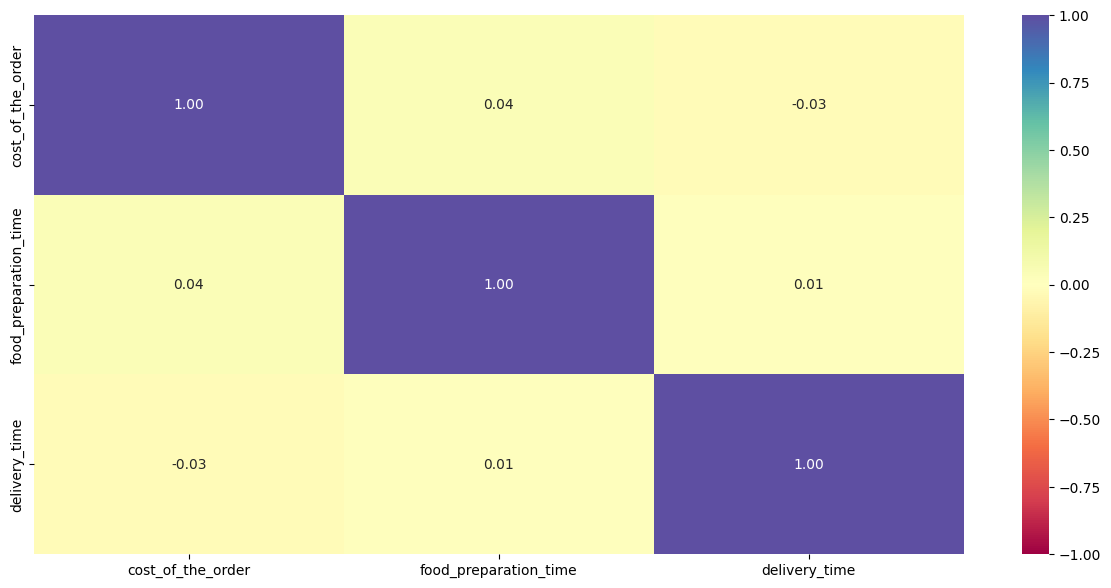

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15,7))
sns.heatmap(df[col_list].corr(), annot=True, vmin= -1, vmax= 1, fmt='.2f', cmap='Spectral')
plt.show()

#### Observations:

* There is no correlation between cost of the order, delivery time and food preparation time.


##The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

#convert the column rating from object to int
df_rated ['rating']= df_rated['rating'].astype('int')

# create a dataframe that contains the restaurant names with their rating counts
df_rating_count=df_rated.groupby(['restaurant_name'])['rating'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count > 50].index.get_level_values('restaurant_name')

# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Shake Shack,4.278195


#### Observations:

* The restaurants fulfilling the criteria to get the promotional offer are: **'The Meatball Shop', 'Blue Ribbon Fried Chicken',  'Shake Shack' and 'Blue Ribbon Sushi'**.


##The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#function to determine the net revenue
def compute_rev(x):
  if x >20:
    return x * 0.25
  elif x>5:
    return x * 0.15
  else:
      return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.


##The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed

In [ ]:
# add a new column to the dataframe df to store the total delivery time
df['total_time']= df['food_preparation_time'] + df['delivery_time']

# calculate the percentage of all orders that has 60 minutes of total delivery time
print('print percentage of order that has totale delivery time of 60:', round(df[df['total_time']> 60].shape[0]/df.shape[0] * 100, 2),'%')

print percentage of order that has totale delivery time of 60: 10.54 %


#### Observations:

* Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.

##The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

* The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.

* This could be due to the dip of traffic volume in the weekends.

#Recommendations and Conclusions

### Conclusions:

* Around 80% of the orders are for American, Japanese, Italian and Chinese cuisines. Thus, it seems that these cuisines are quite popular among customers of FoodHub.
* Shake Shack is the most popular restaurant that has received the highest number of orders.
* Order volumes increase on the weekends compared to the weekdays.
* Delivery time over the weekends is less compared to the weekdays. This could be due to the dip in traffic volume over the weekends.
* Around 39% of the orders have not been rated.

### Business Recommendations:

* FoodHub should integrate with restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines are very popular among FoodHub customers.

* FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders.

* As the order volume is high during the weekends, more delivery persons should be employed during the weekends to ensure timely delivery of the order. Weekend promotional offers should be given to the customers to increase the food orders during weekends.

* Customer Rating is a very important factor to gauge customer satisfaction. The company should investigate the reason behind the low count of ratings. They can redesign the rating page in the app and make it more interactive to lure the customers to rate the order.

* Around 11% of the total orders have more than 60 minutes of total delivery time. FoodHub should try to minimize such instances in order to avoid customer dissatisfaction. They can provide some reward to the punctual delivery persons.